In [3]:
pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
len(X_train)

60000

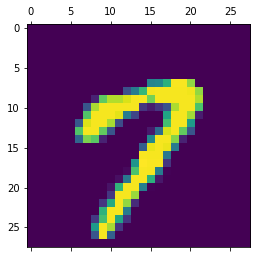

In [12]:
plt.matshow(X_train[15])

In [13]:
y_train[15]

7

In [14]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train=X_train/255
X_test=X_test/255

In [25]:
x_train=X_train.reshape(len(X_train),28*28)
x_test=X_test.reshape(len(X_test),28*28)
x_train.shape

(60000, 784)

In [26]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

WITHOUT ANY HIDDEN LAYER

In [27]:
model=keras.Sequential([
                        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4697 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9258


In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9248


[0.2686576545238495, 0.9247999787330627]

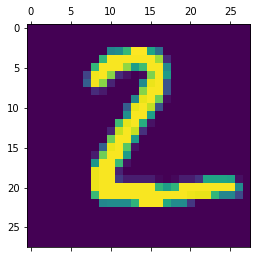

In [32]:
plt.matshow(X_test[1])

In [33]:

predicted=model.predict(x_test)
#print("actual is:",actual)
print("Predicted :",predicted[1])

Predicted : [5.2083981e-01 3.8981438e-03 9.9944931e-01 3.4773147e-01 6.3717981e-10
 8.3442146e-01 8.5565460e-01 1.3318478e-12 1.5346441e-01 1.9146218e-09]


In [34]:
np.argmax(predicted[1])

2

In [36]:
y_pred=[np.argmax(i) for i in predicted]
y_pred[:5]

[7, 2, 1, 0, 4]

In [39]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  924,   16,    9,    3,   11,   10,   42,    2],
       [   4,    0,   21,  920,    0,   22,    2,   12,   23,    6],
       [   1,    1,    6,    1,  928,    0,    6,    3,   11,   25],
       [  11,    3,    5,   35,   11,  771,   11,    6,   33,    6],
       [  14,    3,    9,    1,    8,   15,  904,    2,    2,    0],
       [   1,    5,   22,   10,    9,    0,    0,  947,    4,   30],
       [   9,    6,    7,   21,    9,   22,    8,   12,  874,    6],
       [  11,    5,    1,    9,   38,    6,    0,   24,   11,  904]],
      dtype=int32)>

Text(69.0, 0.5, 'actual')

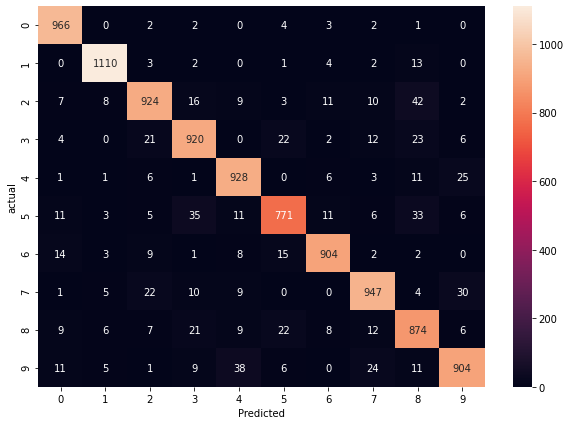

In [42]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

WITH THE HIDDEN LAYER


In [45]:
model=keras.Sequential([
                        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9839


In [46]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9752


[0.08118122816085815, 0.9751999974250793]

Text(69.0, 0.5, 'actual')

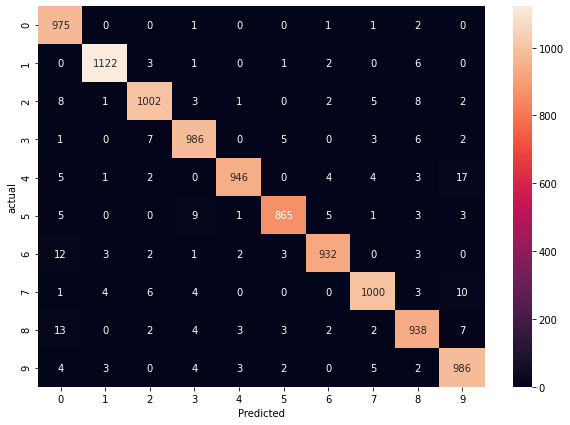

In [47]:
predicted=model.predict(x_test)
y_pred=[np.argmax(i) for i in predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

Flatten With The Keras


In [60]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9844
